In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
 
import P3_helpers as hlp

import os
import pickle
import json
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
communities_dict = hlp.load_communities_dict_for_topic()
src_sets_by_comu_by_year = hlp.get_src_sets_from_com_dict(communities_dict)
years_list = sorted(list(src_sets_by_comu_by_year.keys()))
jacquard_similarities = hlp.jacquard_similarity_for_all_years(src_sets_by_comu_by_year, years_list)
max_jacquard_similarities = hlp.max_jacquard_sim(jacquard_similarities)

In [4]:
nodes = hlp.get_nodes_from_com_dict(communities_dict)

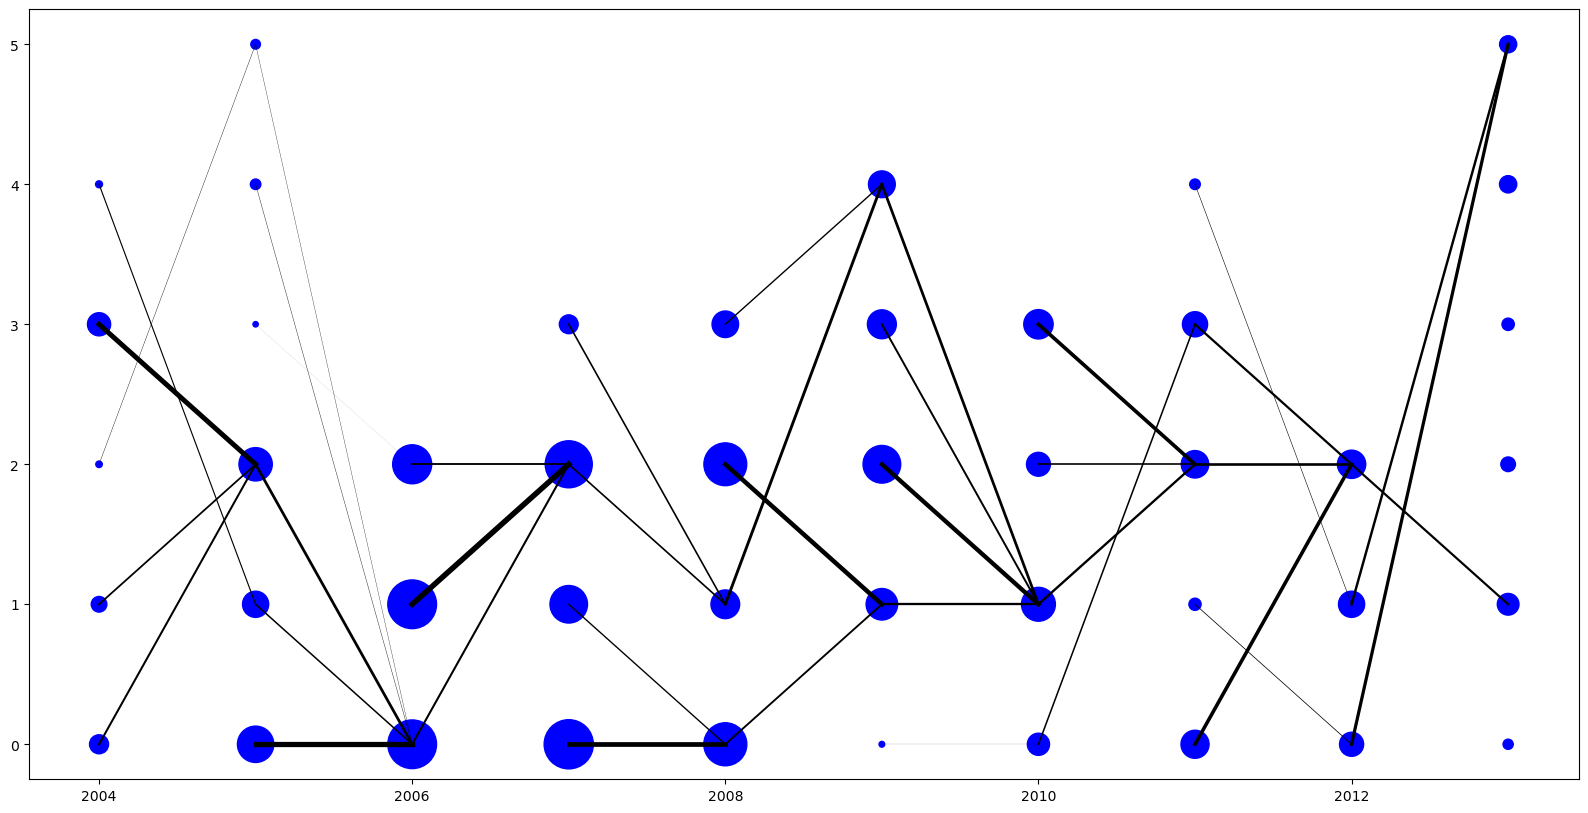

In [5]:
hlp.plot_maxJac_connected_layers(nodes, max_jacquard_similarities)

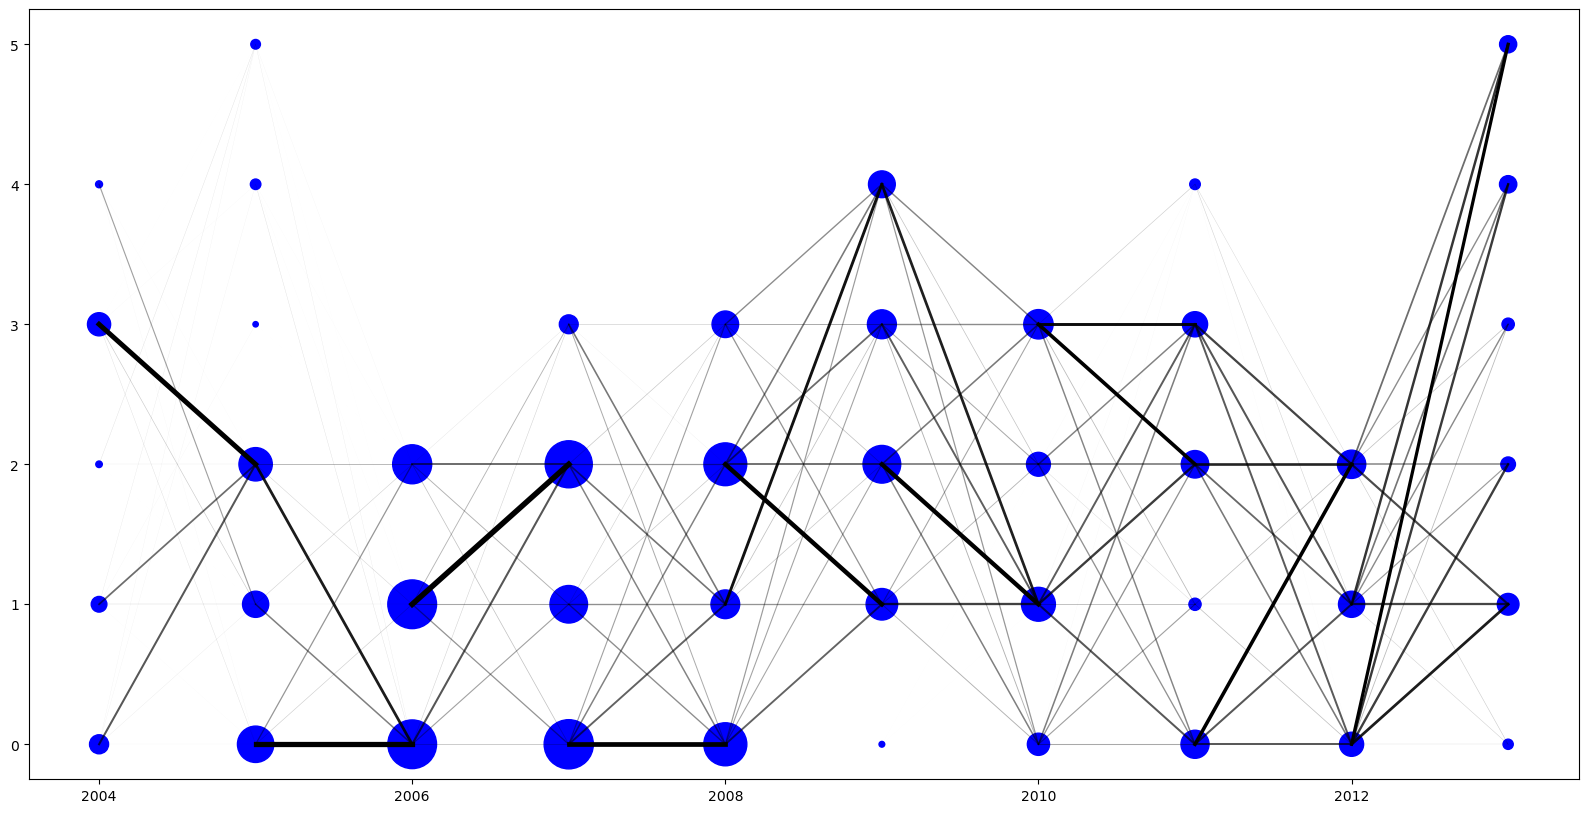

In [25]:
full_edges = hlp.get_edges_from_jacquard_similarities(jacquard_similarities)
hlp.plot_connected_layers(nodes, full_edges)

In [16]:
with open('jd_pie_charts/stats_dict_com.json', 'rb') as f:
    stats_dict_com = pickle.load(f)

stats_dict_com.keys()

dict_keys([('2008', 0.0), ('2008', 1.0), ('2008', 2.0), ('2008', 3.0), ('2005', 0.0), ('2005', 1.0), ('2005', 2.0), ('2005', 3.0), ('2005', 4.0), ('2005', 5.0), ('2010', 2.0), ('2010', 1.0), ('2010', 3.0), ('2010', 0.0), ('2011', 2.0), ('2011', 0.0), ('2011', 3.0), ('2011', 4.0), ('2011', 1.0), ('2009', 2.0), ('2009', 1.0), ('2009', 4.0), ('2009', 3.0), ('2009', 0.0), ('2004', 0.0), ('2004', 1.0), ('2004', 2.0), ('2004', 3.0), ('2004', 4.0), ('2013', 1.0), ('2013', 4.0), ('2013', 2.0), ('2013', 3.0), ('2013', 5.0), ('2013', 0.0), ('2012', 0.0), ('2012', 1.0), ('2012', 2.0), ('2007', 0.0), ('2007', 1.0), ('2007', 2.0), ('2007', 3.0), ('2006', 0.0), ('2006', 1.0), ('2006', 2.0)])

In [17]:
first_pos_first_topic_only_stats= {}
for key, value in stats_dict_com.items():
    first_pos_first_topic_only_stats[key] = {}
    for model_pos, df in value.items():
        model = model_pos[0]
        pos = model_pos[1]
        if pos == 'first':
            id = df['prob_of_topic_to_be_first'].idxmax()
            first_pos_first_topic_only_stats[key][model] = tuple(df.loc[id][['Topic', 'prob_of_topic_to_be_first']])

In [18]:
def reformat_model_from(dic, nb_topics=range(3,10,2)):
    output = {}
    for t_name in nb_topics:
        output[t_name] = {}
        for year_commu, d_model_topic in dic.items():
            for model, topic in d_model_topic.items():
                if model == t_name:
                    output[t_name][year_commu] = (str(topic[0])[0], str(round(topic[1]*100, 2))+'%')
    return output

d_model_point_val = reformat_model_from(first_pos_first_topic_only_stats)

In [28]:
nodes_with_topics

{3: [('2008', 0, 960, '2', '45.56%'),
  ('2008', 1, 427, '1', '36.25%'),
  ('2008', 2, 950, '1', '38.45%'),
  ('2008', 3, 365, '2', '45.27%'),
  ('2005', 0, 685, '2', '55.04%'),
  ('2005', 1, 355, '2', '52.86%'),
  ('2005', 2, 576, '2', '43.34%'),
  ('2005', 3, 15, '0', '46.67%'),
  ('2005', 4, 57, '2', '48.28%'),
  ('2005', 5, 48, '2', '40.65%'),
  ('2010', 2, 296, '2', '40.41%'),
  ('2010', 1, 595, '1', '40.53%'),
  ('2010', 3, 447, '1', '38.65%'),
  ('2010', 0, 255, '2', '41.96%'),
  ('2011', 2, 391, '2', '39.42%'),
  ('2011', 0, 409, '2', '40.01%'),
  ('2011', 3, 329, '1', '40.5%'),
  ('2011', 4, 58, '1', '44.1%'),
  ('2011', 1, 77, '2', '41.76%'),
  ('2009', 2, 736, '1', '38.43%'),
  ('2009', 1, 515, '2', '38.16%'),
  ('2009', 4, 372, '1', '40.51%'),
  ('2009', 3, 434, '2', '41.58%'),
  ('2009', 0, 17, '1', '40.0%'),
  ('2004', 0, 188, '0', '58.35%'),
  ('2004', 1, 127, '0', '65.21%'),
  ('2004', 2, 22, '0', '45.95%'),
  ('2004', 3, 278, '0', '50.28%'),
  ('2004', 4, 25, '1', '50.

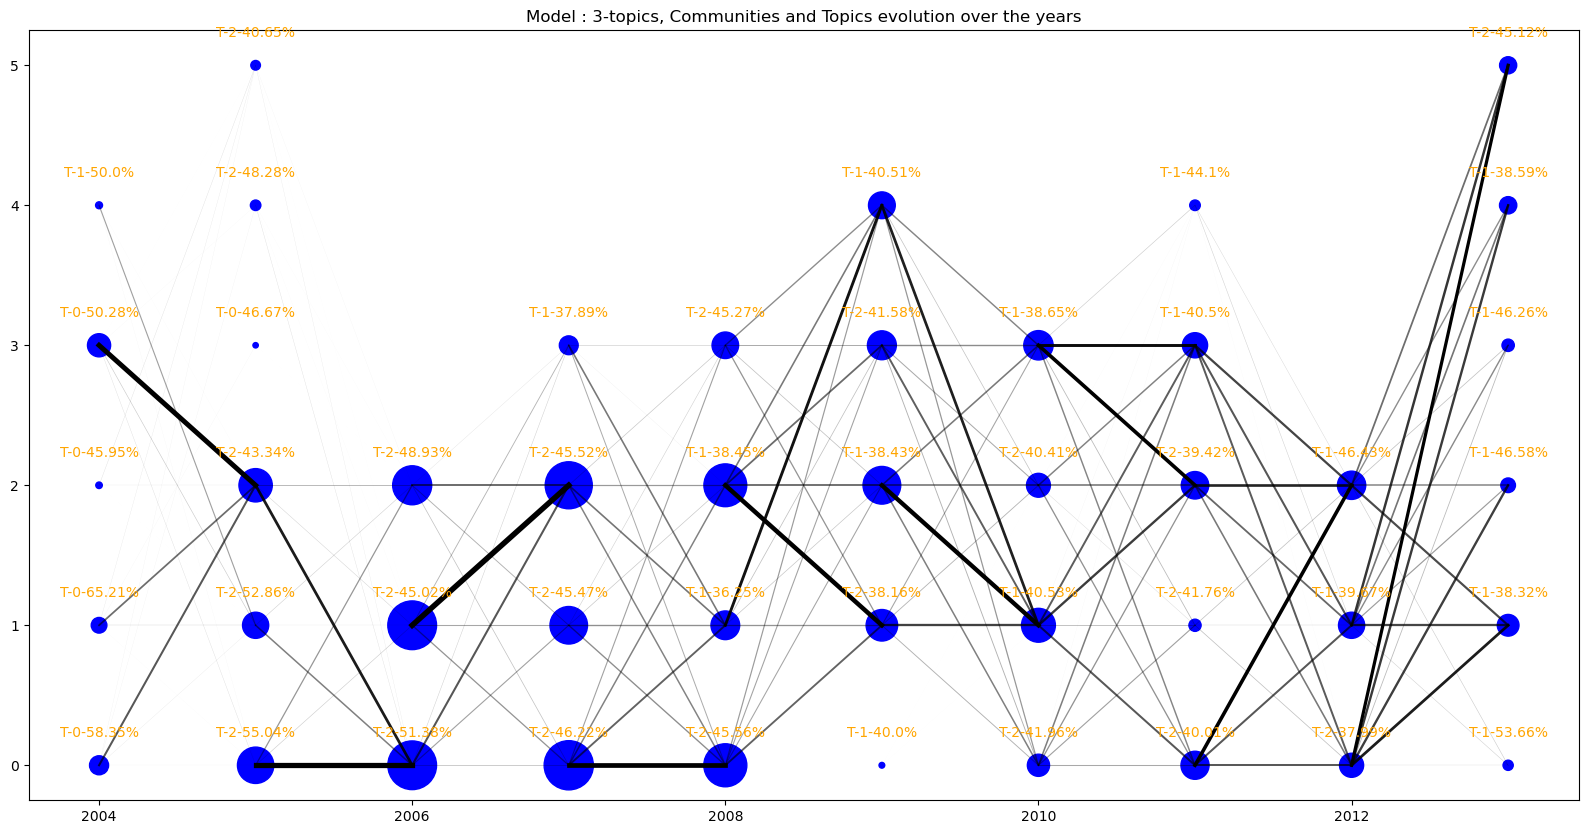

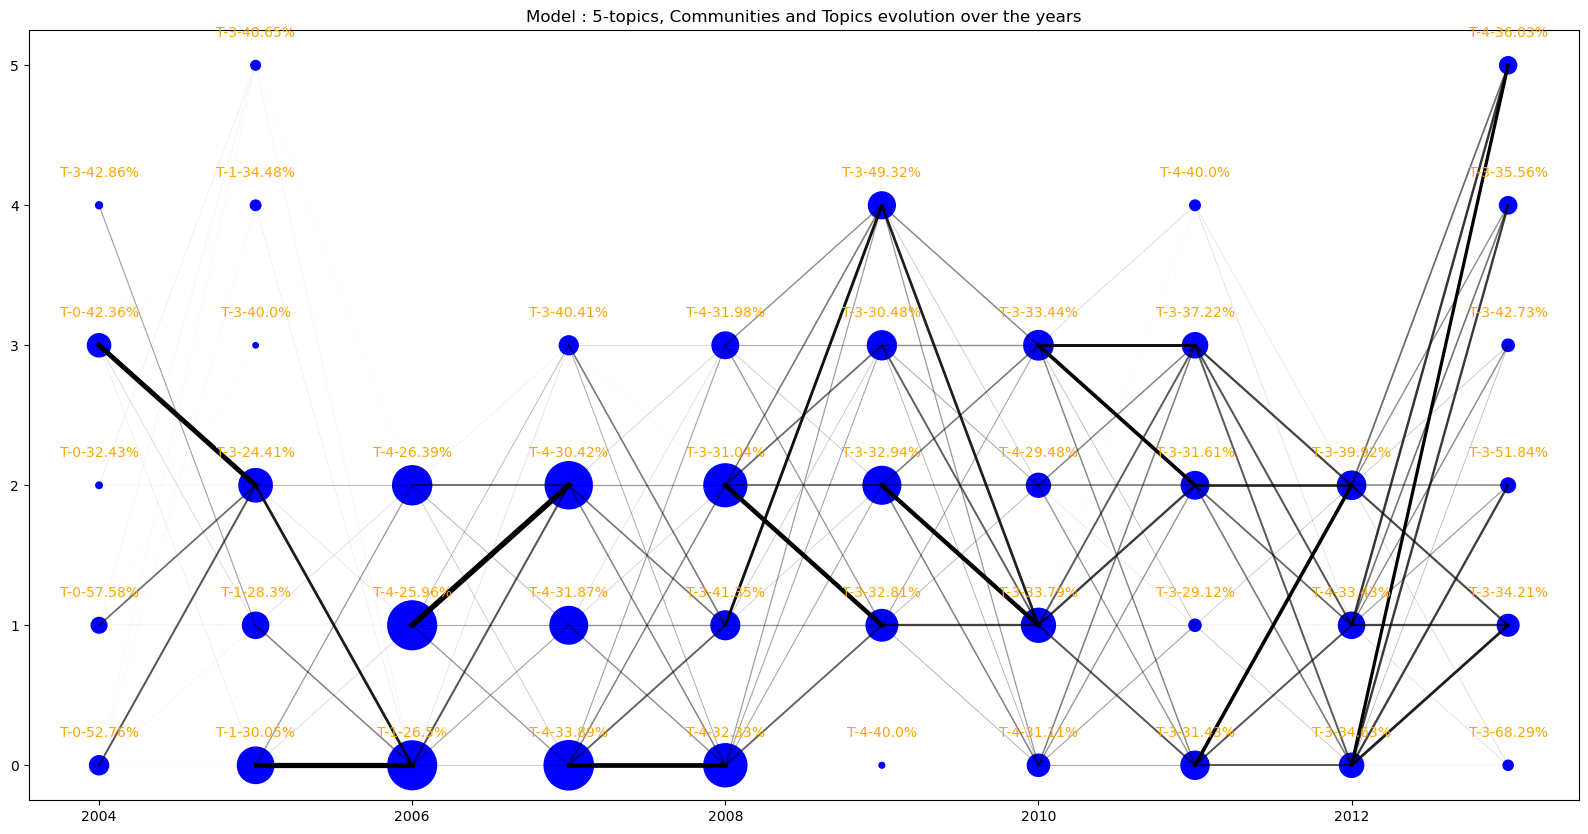

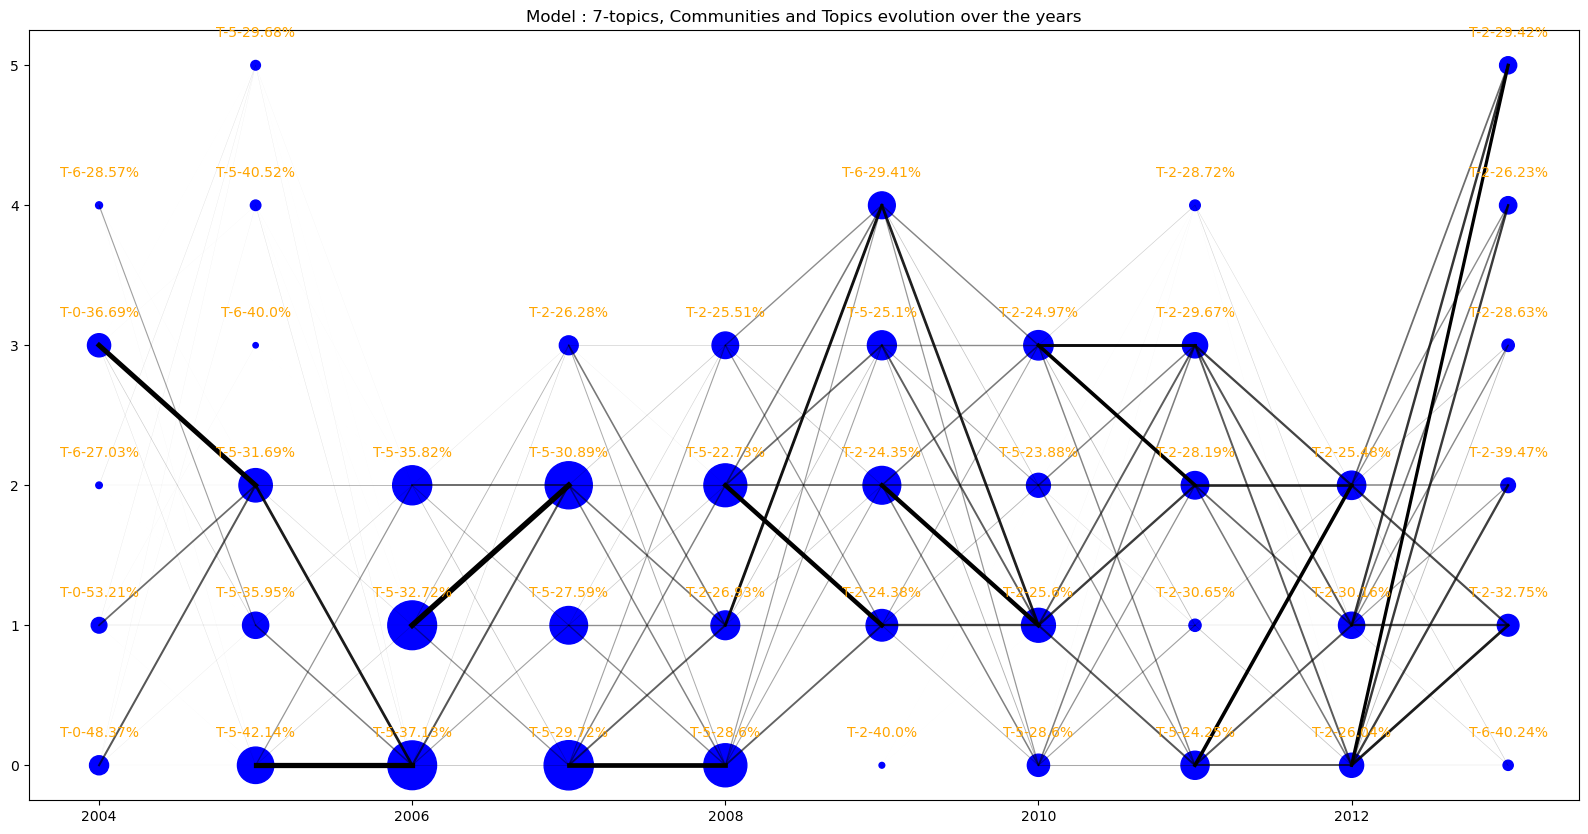

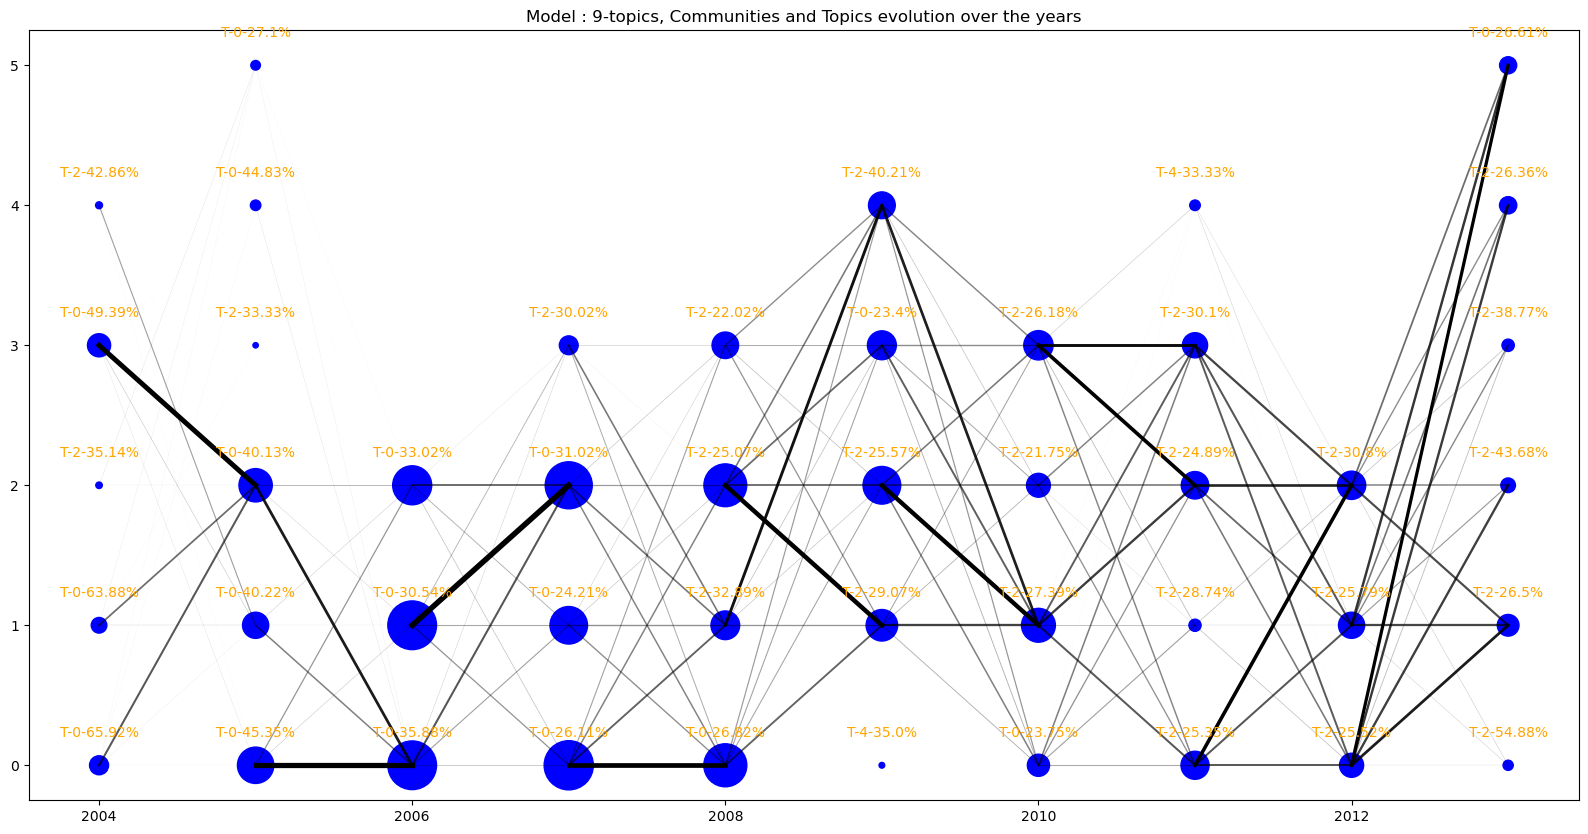

In [31]:
nodes_with_topics = {}
for model, value in d_model_point_val.items():
    nodes_with_topics[model] = []
    for node in nodes:
        topic, prob = value[(node[0], node[1])]
        nodes_with_topics[model].append((node[0], node[1], node[2], topic, prob))

for model, nodes in nodes_with_topics.items():
    hlp.plot_connected_with_topic(nodes, full_edges, str(model))